In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



# Load the Amazon Customer Reviews data

In [2]:
df = pd.read_csv("c:/Users/ERIASAF/Downloads/Amazon Review Data Web Scrapping - Amazon Review Data Web Scrapping.csv")

# New section

In [3]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60889 entries, 0 to 60888
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unique_ID      60889 non-null  int64 
 1   Category       60889 non-null  object
 2   Review_Header  60884 non-null  object
 3   Review_text    60857 non-null  object
 4   Rating         60889 non-null  int64 
 5   Own_Rating     60889 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.8+ MB
None


In [4]:
# Display the first few rows of the dataset
print(df.head())

   Unique_ID Category                           Review_Header  \
0     136040  smartTv                                Nice one   
1     134236   mobile  Huge battery life with amazing display   
2     113945    books                              Four Stars   
3     168076  smartTv                            Nice quality   
4     157302    books                               Nice book   

                                         Review_text  Rating Own_Rating  
0                                         I liked it       5   Positive  
1  I bought the phone on Amazon and been using my...       5   Positive  
2  Awesome book at reasonable price, must buy ......       4   Positive  
3                                               good       5   Positive  
4  The book is fine,not bad,contains nice concept...       3    Neutral  


In [5]:

# Summary statistics of numerical features
print(df.describe())

           Unique_ID        Rating
count   60889.000000  60889.000000
mean   140444.000000      4.081148
std     17577.284607      1.342067
min    110000.000000      1.000000
25%    125222.000000      4.000000
50%    140444.000000      5.000000
75%    155666.000000      5.000000
max    170888.000000      5.000000


In [7]:

# Calculate percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Creating a DataFrame to display the results
missing_values_df = pd.DataFrame({'Column': df.columns, 'Missing Percentage': missing_percentage})

# Print the DataFrame
print(missing_values_df)

                      Column  Missing Percentage
Unique_ID          Unique_ID            0.000000
Category            Category            0.000000
Review_Header  Review_Header            0.008212
Review_text      Review_text            0.052555
Rating                Rating            0.000000
Own_Rating        Own_Rating            0.000000


In [8]:
#Handling Missing Values
# Remove rows with any missing values
df_cleaned = df.dropna()


In [10]:
# Data Cleaning (Assuming removal of duplicates)
df.drop_duplicates(inplace=True)

In [11]:
#  Feature Engineering (Creating a new feature for simplicity)
df['review_length'] = df['Review_Header'] + df['Review_text']

# Step 7: Visualization
# Assuming visualizing a histogram for category, rating, own_rating and unique_id feature

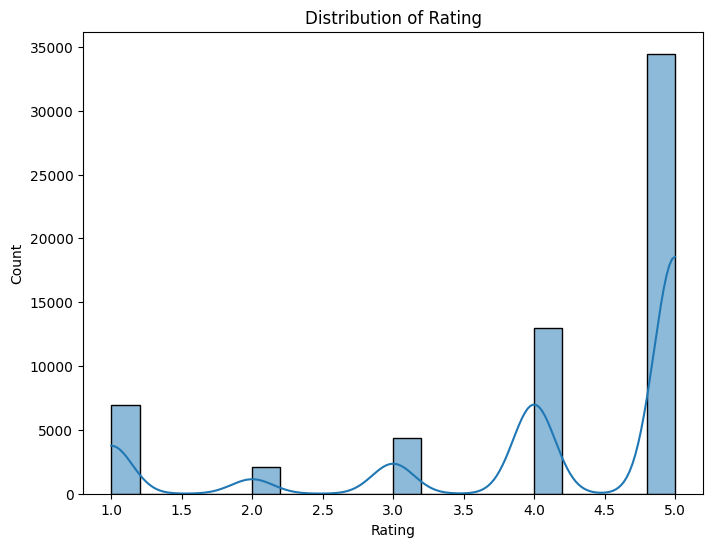

In [12]:

plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Rating')
plt.show()

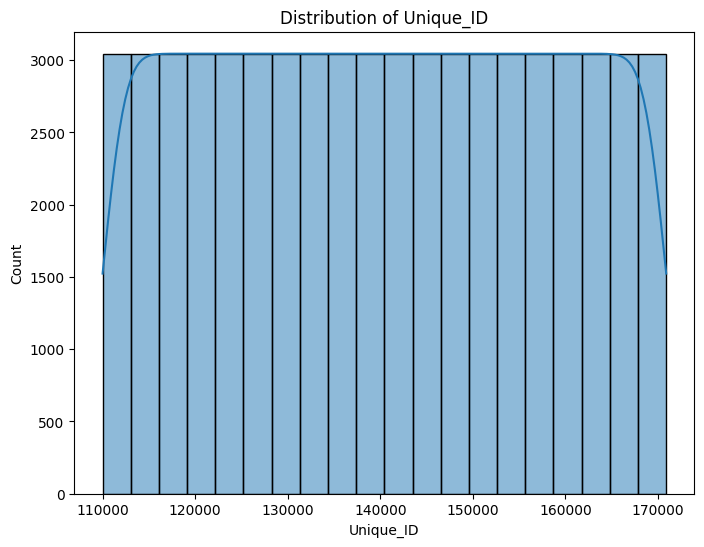

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Unique_ID'], bins=20, kde=True)
plt.title('Distribution of Unique_ID')
plt.show()

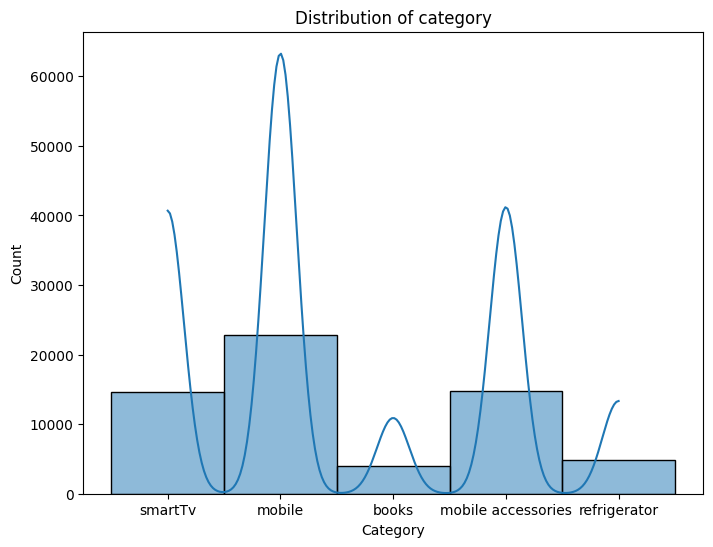

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Category'], bins=20, kde=True)
plt.title('Distribution of category')
plt.show()

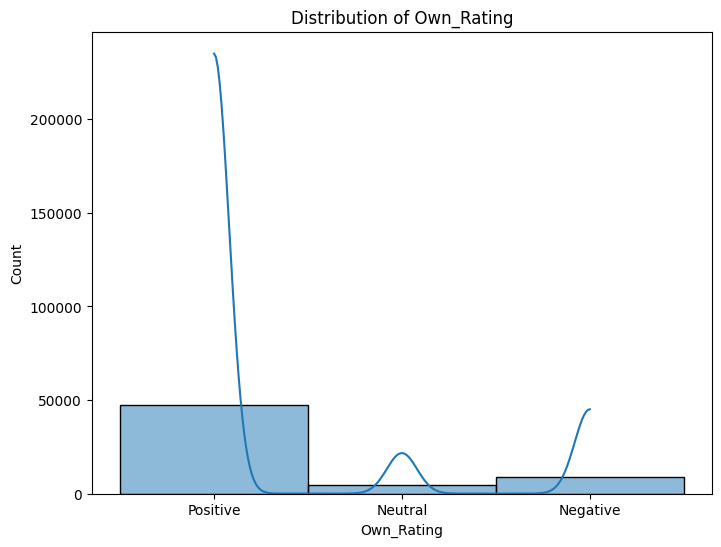

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Own_Rating'], bins=20, kde=True)
plt.title('Distribution of Own_Rating')
plt.show()

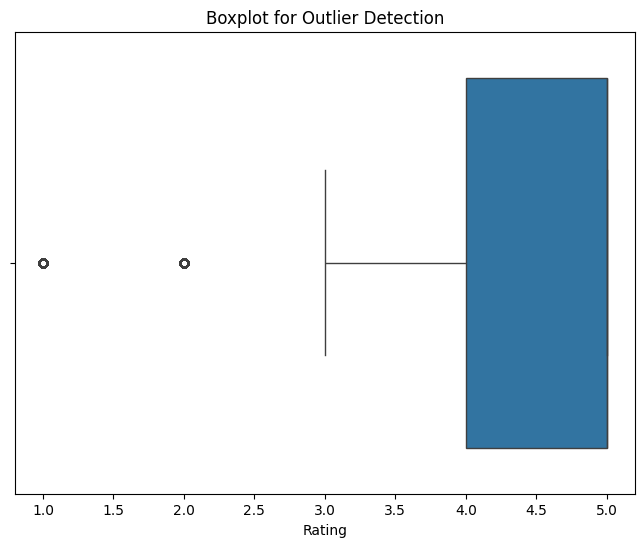

In [16]:
# Outlier Detection (Visualizing outliers using boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Rating'])
plt.title('Boxplot for Outlier Detection')
plt.show()

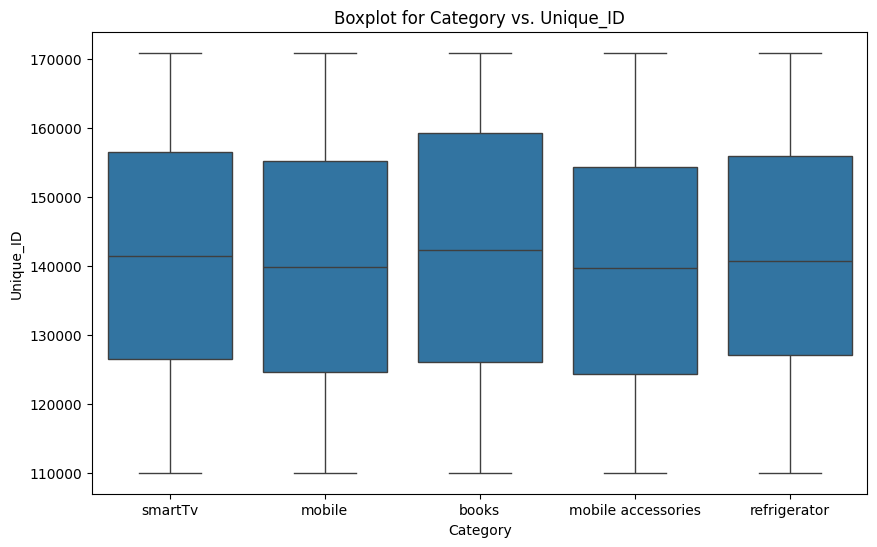

In [17]:
# Boxplot for Categorical Variable vs. Numerical Variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Unique_ID', data=df)
plt.title('Boxplot for Category vs. Unique_ID')
plt.show()

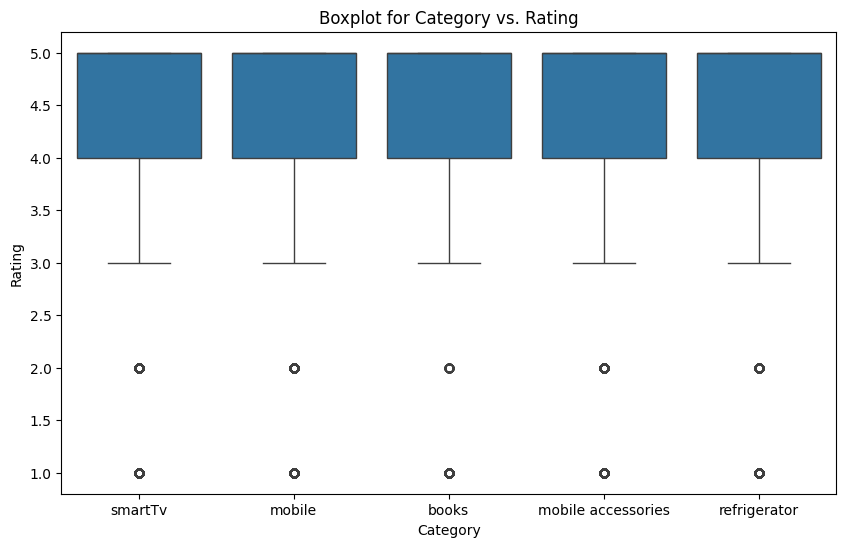

In [18]:

# Boxplot for Categorical Variable vs. Numerical Variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Rating', data=df)
plt.title('Boxplot for Category vs. Rating')
plt.show()

In [19]:

# Statistical Analysis (Calculating correlation for simplicity)
correlation_matrix = df.corr()

ValueError: could not convert string to float: 'smartTv'

<ipython-input-19-74060494d8ea>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['Rating', 'Own_Rating']].corr()


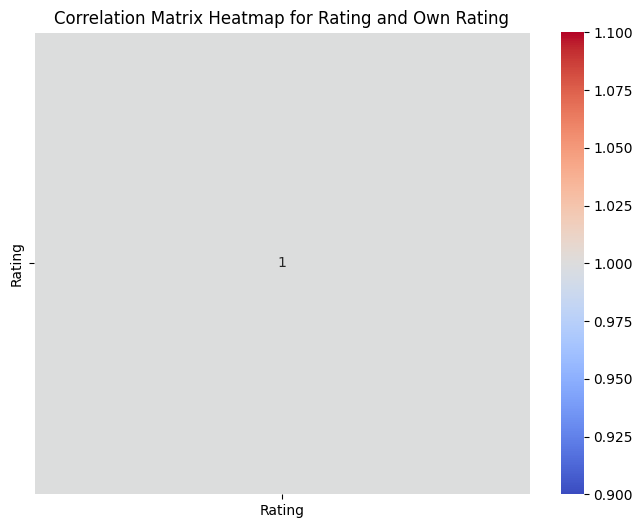

In [ ]:

# Step 8: Heatmap for Correlation Matrix
correlation_matrix = df[['Rating', 'Own_Rating']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap for Rating and Own Rating')
plt.show()

<ipython-input-20-34a5809873bb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['Category', 'Rating']].corr()


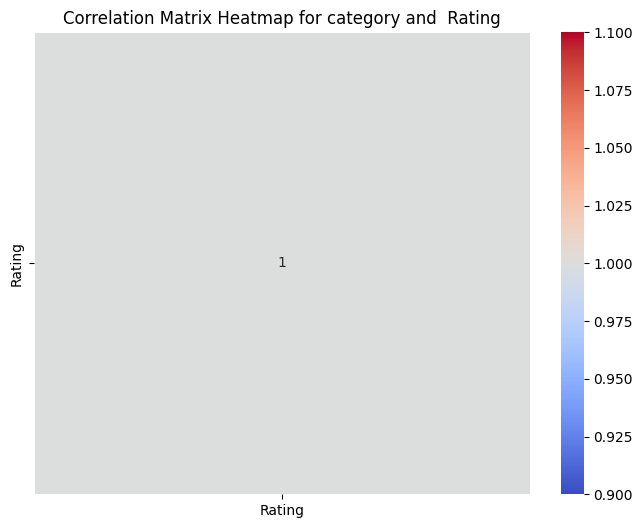

In [ ]:


# Step 8: Heatmap for Correlation Matrix
correlation_matrix = df[['Category', 'Rating']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap for category and  Rating')
plt.show()

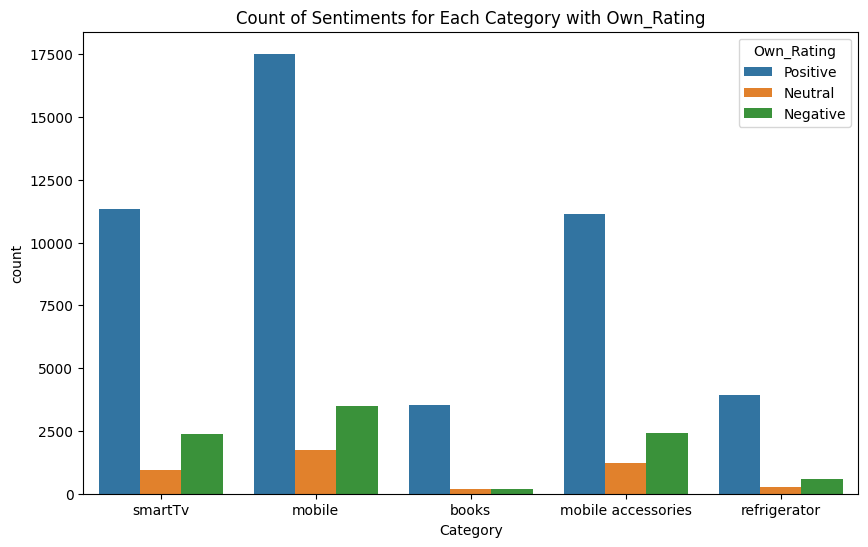

In [ ]:
# Step 9: Patterns of Interest (Assuming exploring patterns based on a categorical variable)
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', hue='Own_Rating', data=df)
plt.title('Count of Sentiments for Each Category with Own_Rating')
plt.show()

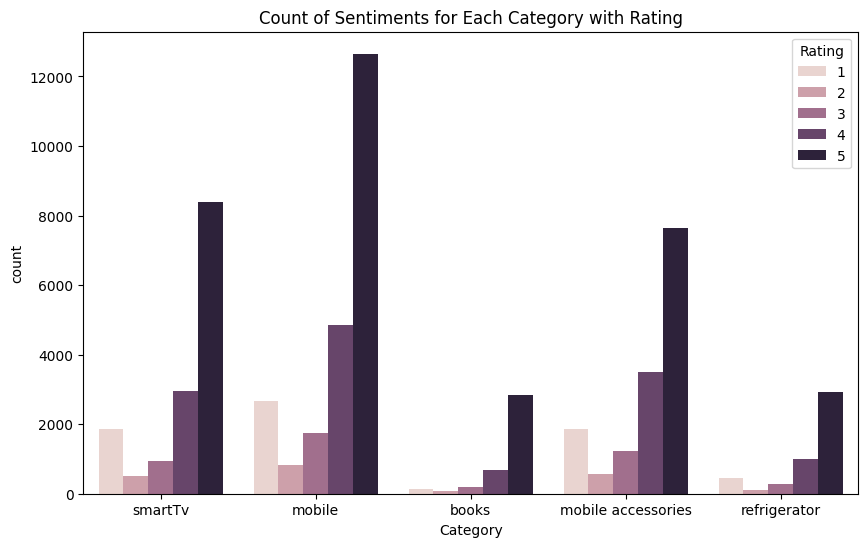

In [20]:

# Patterns of Interest (Assuming exploring patterns based on a category variable)
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', hue='Rating', data=df)
plt.title('Count of Sentiments for Each Category with Rating')
plt.show()

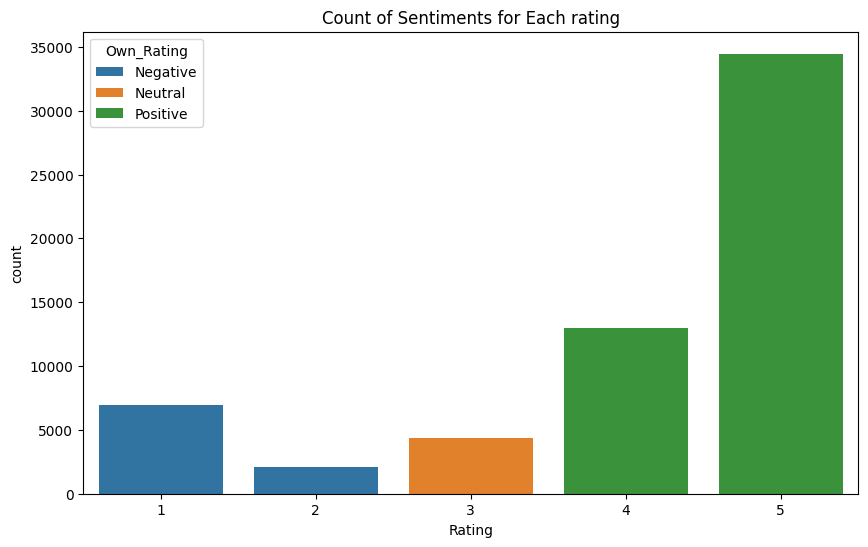

In [21]:

# Patterns of Interest (Assuming exploring patterns based on a rating variable)
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', hue='Own_Rating', data=df)
plt.title('Count of Sentiments for Each rating')
plt.show()

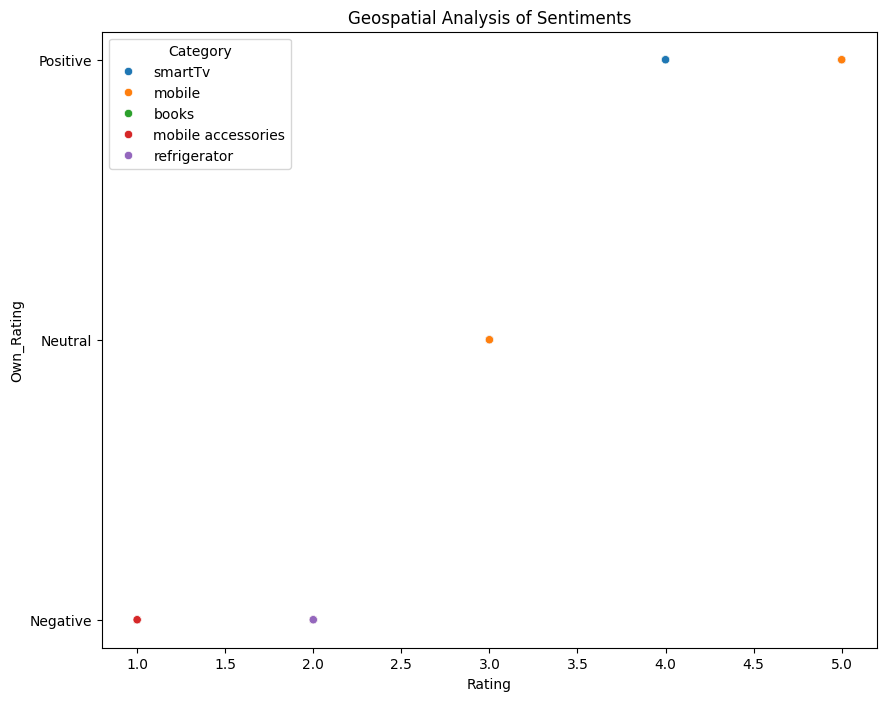

In [22]:
#  space analysis
# let's use a scatter plot for spatial analysis
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Rating', y='Own_Rating', hue='Category', data=df)
plt.title('Geospatial Analysis of Sentiments')
plt.show()

In [23]:


# Define criteria for positive, neutral, and negative sentiments
positive_sentiment = df[df['Rating'].isin([4, 5])]
neutral_sentiment = df[df['Rating'] == 3]
negative_sentiment = df[df['Rating'].isin([1, 2])]

# Calculate proportions
total_reviews = len(df)
positive_proportion = len(positive_sentiment) / total_reviews
neutral_proportion = len(neutral_sentiment) / total_reviews
negative_proportion = len(negative_sentiment) / total_reviews

print("Proportion of Positive Sentiments:", positive_proportion)
print("Proportion of Neutral Sentiments:", neutral_proportion)
print("Proportion of Negative Sentiments:", negative_proportion)

Proportion of Positive Sentiments: 0.7790569725237728
Proportion of Neutral Sentiments: 0.0717042487148746
Proportion of Negative Sentiments: 0.14923877876135264


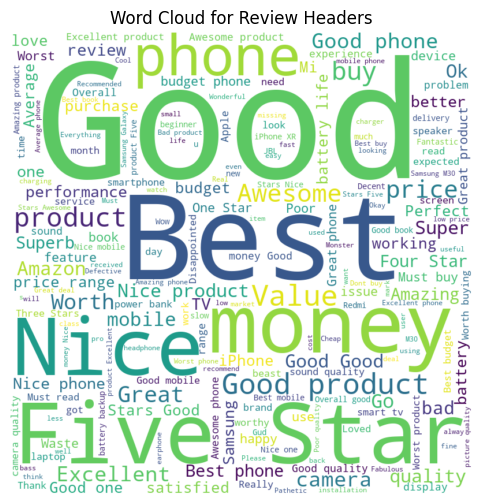

In [24]:

from wordcloud import WordCloud

# Drop rows with missing values in the 'Review_Header' column
df_cleaned = df.dropna(subset=['Review_Header'])

# Generate WordCloud
wordcloud_header = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(df_cleaned['Review_Header']))

# Plot WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_header, interpolation='bilinear')
plt.title('Word Cloud for Review Headers')
plt.axis("off")
plt.show()

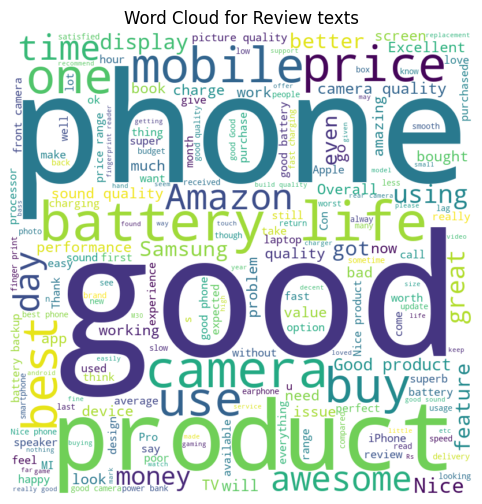

In [25]:
#from wordcloud import WordCloud
# Drop rows with missing values in the 'Review_text' column
df_cleaned = df.dropna(subset=['Review_text'])

# Generate WordCloud( mostly used words)
wordcloud_text = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(df_cleaned['Review_text']))

# Plot WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_text, interpolation='bilinear')
plt.title('Word Cloud for Review texts')
plt.axis("off")
plt.show()

Implementing random forest

In [26]:
# Remove rows with missing values
df.dropna(subset=['Review_text', 'Rating'], inplace=True)

# Preprocessing: Split data into features and target
X = df['Review_text']  # Features
y = df['Rating']        # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Continue with the model training and evaluation as before

In [27]:


# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_tfidf, y_train)

# Predict the sentiment on the testing set
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6426224120933289


In [29]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.61      0.72      0.66      1382
           2       0.14      0.01      0.01       432
           3       0.31      0.04      0.08       886
           4       0.35      0.13      0.19      2575
           5       0.68      0.93      0.79      6897

    accuracy                           0.64     12172
   macro avg       0.42      0.37      0.35     12172
weighted avg       0.56      0.64      0.57     12172



In [30]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [33]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

In [ ]:
# Predict using the best model
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test_tfidf)

In [ ]:

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
mlflow ui

In [ ]:
import mlflow
import dvc.api
# Start MLflow tracking
mlflow.set_tracking_uri("http://localhost:5000")  # Set MLflow tracking URI
mlflow.set_experiment("CustomerFeedback Sentiment Analysis")     # Set MLflow experiment name

2024/03/07 02:38:12 INFO mlflow.tracking.fluent: Experiment with name 'customer sentiment analysis' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/881741577468812734', creation_time=1709807892838, experiment_id='881741577468812734', last_update_time=1709807892838, lifecycle_stage='active', name='customer sentiment analysis', tags={}>

In [ ]:


# Log parameters and metrics
with mlflow.start_run():
    mlflow.log_param("Learning_rate", learning_rate)
    mlflow.log_metric("Accuracy", accuracy)

    # Log model artifacts
    mlflow.log_artifact("model.pkl")

# Use DVC to version control datasets and models
with dvc.api.open("data/Amazon Review Data Web Scrapping - Amazon Review Data Web Scrapping.csv", repo="https://github.com/eriasaf/Machine.git", mode="r") as fd:
    df = pd.read_csv(fd)

# Track changes to datasets and models
dvc add data/data.csv
dvc push

Experiment Tracking and Model Versioning with MLflow:

In [ ]:
# Load and preprocess your data
# Assume X_train, X_test, y_train, y_test are already defined

# Define and train your model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Log parameters, metrics, and artifacts
with mlflow.start_run():
    mlflow.log_param("n_estimators", model.n_estimators)
    mlflow.log_param("max_depth", model.max_depth)
    mlflow.log_metric("accuracy", accuracy)
    
    # Log the trained model as an artifact
    mlflow.sklearn.log_model(model, "random_forest_model")


In [ ]:
import dvc.api

# Use DVC to version control your datasets and models
# Assuming you have your data and model files already initialized with DVC
# Let's assume 'data.csv' is your dataset and 'random_forest_model.pkl' is your trained model

# Pull the latest changes from DVC remote (if needed)
dvc pull

# Load data from DVC
with dvc.api.open("data/data.csv", repo="https://github.com/user/project.git", mode="r") as fd:
    df = pd.read_csv(fd)

# Train your model
# (Code for model training goes here)

# Save the trained model using DVC
dvc add random_forest_model.pkl

# Commit changes and push to DVC remote
dvc push


In [ ]:
mlflow models serve -m runs:/<RUN_ID>/random_forest_model -p 5001


TEST DEPLOYMENT

In [ ]:
import requests

# Example input data for testing
data = {"features": [[1, 2, 3, 4], [5, 6, 7, 8]]}

# Send a POST request to the server
response = requests.post("http://localhost:5001/invocations", json=data)

# Print the predictions
print(response.json())


In [ ]:
# Use an official Python runtime as a parent image DOCKER FILE
FROM python:3.8-slim

# Set the working directory in the container
WORKDIR /app

# Copy the current directory contents into the container at /app
COPY . /app

# Install any needed dependencies specified in requirements.txt
RUN pip install mlflow

# Make port 5001 available to the world outside this container
EXPOSE 5001

# Define environment variable
ENV MLFLOW_TRACKING_URI=http://localhost:5000

# Run mlflow models serve when the container launches
CMD ["mlflow", "models", "serve", "-m", "runs:/<RUN_ID>/random_forest_model", "-p", "5001"]


In [ ]:
docker build -t mlflow-server .


In [ ]:
docker run -p 5001:5001 mlflow-server
